In [1]:
import cv2
import matplotlib.pyplot as plt

from voc import make_filepath_list, GetBBoxAndLabel, VOC_LABEL_NAMES, DataTransform

# データから画像ファイルとアノテーションファイルをリスト化する

In [2]:
rootpath = "./data/VOCdevkit/VOC2012/"
tr_img, tr_anno, val_img, val_anno = make_filepath_list(rootpath=rootpath)

In [3]:
tr_img[:3], tr_anno[:3]

(['./data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg',
  './data/VOCdevkit/VOC2012/JPEGImages/2008_000015.jpg',
  './data/VOCdevkit/VOC2012/JPEGImages/2008_000019.jpg'],
 ['./data/VOCdevkit/VOC2012/Annotations/2008_000008.xml',
  './data/VOCdevkit/VOC2012/Annotations/2008_000015.xml',
  './data/VOCdevkit/VOC2012/Annotations/2008_000019.xml'])

# バウンディングボックスの確認

In [4]:
# アノテーションファイルパスから正規化されたバウンディングボックスを取得する
annotation = GetBBoxAndLabel(VOC_LABEL_NAMES)

In [5]:
index = 19
img_path = tr_img[index]
anno_path = tr_anno[index]

img = cv2.imread(img_path)
height, width, _ = img.shape

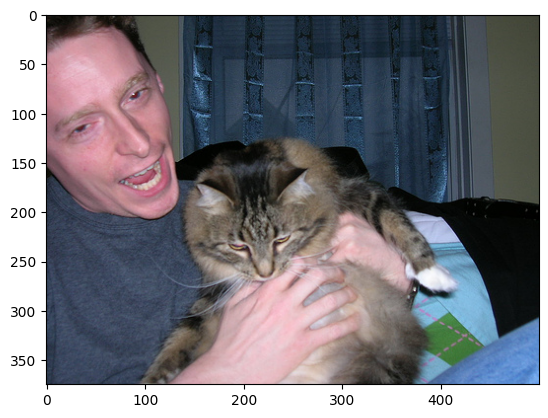

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
# widthとheightを与えると正規化されたバウンディングボックスが取得できる
annos = annotation(anno_path, width=width, height=height)

In [8]:
annos

array([[ 0.        ,  0.        ,  0.998     ,  0.99733333, 14.        ],
       [ 0.19      ,  0.328     ,  0.83      ,  0.99733333,  7.        ]])

In [15]:
img_with_bb = img.copy()
for anno in annos:
    img_with_bb = cv2.rectangle(
        img_with_bb, (int(anno[0]*width), int(anno[1]*height)), (int(anno[2]*width), int(anno[3]*height)), color=(0, 0, 255))

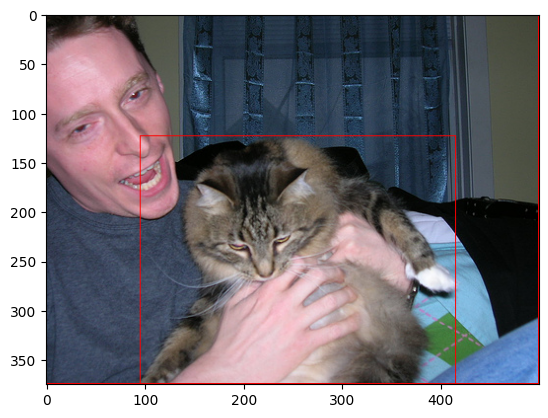

In [16]:
plt.imshow(cv2.cvtColor(img_with_bb, cv2.COLOR_BGR2RGB))

# Augmentationの確認

In [17]:
# from chap02.sec02.object_detection.voc import DataTransform

In [18]:
# VOCデータセットのRGB平均値は123, 117, 104
# cv2はBGRなのでこの順
color_mean = (104, 117, 123)
input_size = 300
transform = DataTransform(input_size=input_size, color_mean=color_mean)

In [19]:
phase = "train"
img_transformed, boxes, labels = transform(img, phase, annos[:, :4], annos[:, 4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


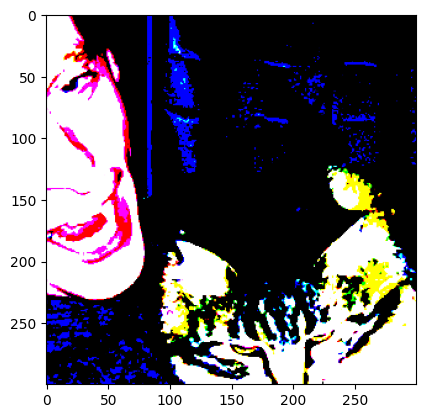

In [20]:
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))

In [21]:
phase = "val"
img_transformed, boxes, labels = transform(img, phase, annos[:, :4], annos[:, 4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


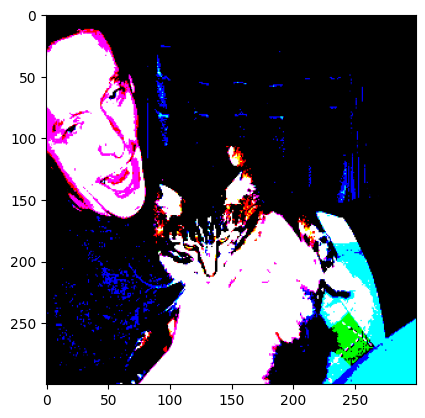

In [22]:
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))